SyntaxError: invalid syntax (3036988125.py, line 1)

In [32]:
import folium
import matplotlib.pyplot as plt 
import seaborn as sns 
#import geopandas as gpd 
import math
import pandas as pd
import numpy as np

# 모든 버스정류장을 folium에 뿌리기

feature 데이터
- 버스 타입
- 루트(?)
- 정류장 코드
- 정류장 순서(아마도 종점으로부터)
- 정류장 이름
- 위도, 경도


출처
- http://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do
  

In [33]:
df = pd.read_excel('서울시버스노선별정류소정보_20230613.xlsx')
df.head()

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,100000004,8001,1,113000053,14143,신덕성결교회,126.956691,37.545941
1,100000004,8001,2,113000056,14146,한겨레신문사,126.959089,37.548006
2,100000004,8001,3,102000133,3227,만리동고개,126.962971,37.551716
3,100000004,8001,4,102000134,3228,손기정체육공원,126.966423,37.554215
4,100000004,8001,5,101000013,2105,서울역서부,126.969277,37.556998


In [34]:
x_mean = df['X좌표'].mean()
y_mean = df['Y좌표'].mean()

In [35]:
from folium.plugins import MarkerCluster

m_1 = folium.Map(location=[y_mean,x_mean],zoom_start=12)
mc = MarkerCluster().add_to(m_1)

In [36]:
for index, row in df.iterrows():
    location = [row['Y좌표'],row['X좌표']]
    name = row['정류소명']
    
    if (location[0] and location[1]):
        mc.add_child(folium.Marker(location=location, tooltip=f'<b>{name}</b>'))
    else:
        pass

m_1.add_child(mc)
m_1.save("버스정류장.html")


# 모든 버스정류장별 승하차 인원

In [37]:
# 모든 버스번호
bus_number = df['노선명'].unique()
bus_number

array(['8001', '8321A', '8321B', '54321', '12345', '1991', 'N854', 'N876',
       '청와대A01(자율주행)', '01', '03', '05', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '110B국민대', '110A고려대', '120',
       '130', '140', '141', '142', '143', '144', '145', '146', '147',
       '148', '150', '151', '152', '163', '160', '162', '171', '172',
       '201', '202', '260', '261', '262', '270', '271', '272', '273',
       '301', '302', '303', '340', '341', '360', '370', '401', '402',
       '406', '420', '441', '461', '470', '471', '472', '500', '501',
       '503', '504', '505', '506', '507', '540', '571', '600', '601',
       '602', '603', '604', '605', '606', '640', '641', '642', '643',
       '650', '651', '652', '661', '701', '702A서오릉', '702B용두초교', '703',
       '704', '706', '710', '720', '721', '750A', '742', '752', '753',
       '0017', '1014', '1017', '1020', '1111', '1113', '1114', '1119',
       '1120', '1124', '1126', '1127', '1128', '1129', '1130', '1131',
       '11

In [38]:
year_lst = ['2021','2022']
month_lst = [str(month).zfill(2) for month in range(1, 13)]

year_month_lst =[]

for year in year_lst:
    for month in month_lst:
        y_m = f'{year}{month}'
        year_month_lst.append(y_m)

print(year_month_lst)

['202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212']


In [39]:
# import requests

# key = "5473486d6f62726f37356f75665961"
# df_bus = pd.DataFrame()

# for y_m in year_month_lst:
#     for num in bus_number:
#         url = f"http://openapi.seoul.go.kr:8088/{key}/json/CardBusTimeNew/1/1000/{y_m}/{num}"
#         data = requests.get(url)
#         contents = data.json()
#         if 'CardBusTimeNew' in contents:
#             row = contents['CardBusTimeNew']['row']
#             df_bus = df_bus.append(row, ignore_index=True)


총승객수는 월 전체일자의 시간대별 승하차 총 인원을 합산한 값입니다.

In [40]:
import requests

key = "5473486d6f62726f37356f75665961"
df_bus = pd.DataFrame()

for num in bus_number:
    url = f"http://openapi.seoul.go.kr:8088/{key}/json/CardBusTimeNew/1/1000/{202206}/{num}"
    data = requests.get(url)
    contents = data.json()
    if 'CardBusTimeNew' in contents:
        row = contents['CardBusTimeNew']['row']
        df_bus = df_bus.append(row, ignore_index=True)

In [41]:
df_bus.to_csv('버스시간별승하차_202206.csv',encoding='utf-8-sig')

In [42]:
df_bus_6to9=df_bus[['USE_MON', 'BUS_ROUTE_NO', 'BUS_ROUTE_NM', 'STND_BSST_ID','BSST_ARS_NO',\
         'BUS_STA_NM','SIX_ALIGHT_NUM', 'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM',\
            'EIGHT_RIDE_NUM', 'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM','NINE_ALIGHT_NUM']]

In [43]:
df_bus_6to9[['SIX_ALIGHT_NUM', 'SEVEN_RIDE_NUM',
       'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM', 'EIGHT_ALIGHT_NUM',
       'NINE_RIDE_NUM', 'NINE_ALIGHT_NUM']]

,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM
0,4.0,173.0,49.0,30.0,8.0,84.0,14.0
1,70.0,143.0,153.0,156.0,248.0,103.0,186.0
2,5.0,46.0,32.0,15.0,23.0,31.0,22.0
3,6.0,80.0,73.0,103.0,88.0,106.0,61.0
4,2.0,50.0,53.0,131.0,60.0,110.0,63.0
...,...,...,...,...,...,...,...
39418,0.0,0.0,58.0,0.0,90.0,0.0,21.0
39419,0.0,2.0,15.0,0.0,130.0,1.0,37.0
39420,0.0,0.0,195.0,1.0,216.0,1.0,154.0
39421,11.0,445.0,46.0,339.0,32.0,230.0,21.0


In [44]:
df_bus_6to9

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM
0,202206,01,01번(예장주차장~예장주차장),101000331,02291,남산예장버스환승주차장,4.0,173.0,49.0,30.0,8.0,84.0,14.0
1,202206,01,01번(예장주차장~예장주차장),102000316,03347,남산도서관,70.0,143.0,153.0,156.0,248.0,103.0,186.0
2,202206,01,01번(예장주차장~예장주차장),101000111,02215,백범광장,5.0,46.0,32.0,15.0,23.0,31.0,22.0
3,202206,01,01번(예장주차장~예장주차장),101000265,02285,힐튼호텔,6.0,80.0,73.0,103.0,88.0,106.0,61.0
4,202206,01,01번(예장주차장~예장주차장),101000029,02124,남대문시장악세사리전문상가,2.0,50.0,53.0,131.0,60.0,110.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39418,202206,강동02,강동02(가래여울~암사동서원마을),124900130,25763,강동리버스트8단지,0.0,0.0,58.0,0.0,90.0,0.0,21.0
39419,202206,강동02,강동02(가래여울~암사동서원마을),124900128,25764,강빛초.중학교,0.0,2.0,15.0,0.0,130.0,1.0,37.0
39420,202206,강동02,강동02(가래여울~암사동서원마을),124900111,25760,가래여울,0.0,0.0,195.0,1.0,216.0,1.0,154.0
39421,202206,강동02,강동02(가래여울~암사동서원마을),124000203,25320,강일리버파크4단지.2단지,11.0,445.0,46.0,339.0,32.0,230.0,21.0


In [45]:
# 정류장 별 승하차 수 확인?
# df_bus_6to9.groupby(['BUS_ROUTE_NO']).max()
df_bus_6to9[df_bus_6to9['BUS_ROUTE_NO']=='1020']

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM
8312,202206,1020,1020번(정릉~교보문고),107000070,08160,정릉북한산국립공원입구,0.0,367.0,0.0,536.0,1.0,191.0,1.0
8313,202206,1020,1020번(정릉~교보문고),100000063,01158,일성아파트,15.0,334.0,25.0,382.0,34.0,205.0,32.0
8314,202206,1020,1020번(정릉~교보문고),100000062,01157,평창동주민센터,18.0,556.0,76.0,451.0,117.0,308.0,75.0
8315,202206,1020,1020번(정릉~교보문고),100000061,01156,평창파출소,32.0,985.0,76.0,687.0,211.0,548.0,88.0
8316,202206,1020,1020번(정릉~교보문고),100000060,01155,갑을씨티텔앞,12.0,413.0,71.0,262.0,165.0,138.0,45.0
8317,202206,1020,1020번(정릉~교보문고),100000038,01133,세검정초등학교,50.0,632.0,80.0,709.0,199.0,500.0,90.0
8318,202206,1020,1020번(정릉~교보문고),100000189,01287,상명대입구.석파랑,28.0,329.0,103.0,309.0,143.0,236.0,127.0
8319,202206,1020,1020번(정릉~교보문고),100000041,01136,하림각,52.0,220.0,51.0,406.0,68.0,217.0,100.0
8320,202206,1020,1020번(정릉~교보문고),100000042,01137,자하문터널입구.석파정,16.0,198.0,34.0,265.0,111.0,171.0,105.0
8321,202206,1020,1020번(정릉~교보문고),100000043,01138,부암동주민센터.무계원,26.0,215.0,81.0,330.0,184.0,354.0,269.0


# 버스 정류장 위치 산점도

In [46]:
df.head()

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,100000004,8001,1,113000053,14143,신덕성결교회,126.956691,37.545941
1,100000004,8001,2,113000056,14146,한겨레신문사,126.959089,37.548006
2,100000004,8001,3,102000133,3227,만리동고개,126.962971,37.551716
3,100000004,8001,4,102000134,3228,손기정체육공원,126.966423,37.554215
4,100000004,8001,5,101000013,2105,서울역서부,126.969277,37.556998


/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


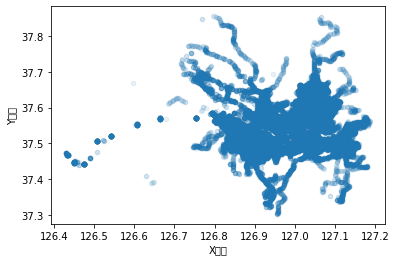

In [47]:
df.plot(kind='scatter',x='X좌표',y='Y좌표',alpha=0.1)
plt.show()

# 정류장별 버스 운행 횟수

# 혼잡도 -> **인증키 에러가 뜬다
https://www.data.go.kr/data/15000314/openapi.do#tab_layer_detail_function

In [48]:

import requests

key="795449424862726f313130556a505844"
route = '100100016'
params ={'srviceKey' : key, 'busRouteId' : route}

url = f'http://ws.bus.go.kr/api/rest/buspos/getBusPosByRouteSt?ServiceKey={key}&busRouteId={route}&startOrd=1&endOrd=13&resultType=json'
response = requests.get(url, params=params)
data = response.json()
data

{'comMsgHeader': {'successYN': None,
  'returnCode': None,
  'errMsg': None,
  'responseTime': None,
  'requestMsgID': None,
  'responseMsgID': None},
 'msgHeader': {'headerMsg': 'Key인증실패: SERVICE KEY IS NOT REGISTERED ERROR.[인증모듈 에러코드(30)]',
  'headerCd': '7',
  'itemCount': 0},
 'msgBody': {'itemList': None}}

# 버스 노선별 정류장 구간별 총 승객수
- https://data.seoul.go.kr/dataList/OA-21218/S/1/datasetView.do

In [49]:
import requests
import pprint

key = "795449424862726f313130556a505844"

url = f'http://openapi.seoul.go.kr:8088/{key}/xml/tpssRouteSectionUser/1/1000/20230612'
response = requests.get(url)
content = response.text

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(content)

('<?xml version="1.0" encoding="UTF-8"?>\n'
 '<tpssRouteSectionUser>\n'
 '<list_total_count>37780</list_total_count>\n'
 '<RESULT>\n'
 '<CODE>INFO-000</CODE>\n'
 '<MESSAGE>정상 처리되었습니다</MESSAGE>\n'
 '</RESULT>\n'
 '<row>\n'
 '<CRTR_DT>20230612</CRTR_DT>\n'
 '<ROUTE_ID>100100001</ROUTE_ID>\n'
 '<START_STTN_ID>100000004</START_STTN_ID>\n'
 '<ARV_STTN_ID>101000001</ARV_STTN_ID>\n'
 '<STTN_ORD>23</STTN_ORD>\n'
 '<LOADPSGR_TOT_DD>500</LOADPSGR_TOT_DD>\n'
 '<LOADPSGR_TOT_0HH/>\n'
 '<LOADPSGR_TOT_1HH/>\n'
 '<LOADPSGR_TOT_2HH/>\n'
 '<LOADPSGR_TOT_3HH/>\n'
 '<LOADPSGR_TOT_4HH/>\n'
 '<LOADPSGR_TOT_5HH/>\n'
 '<LOADPSGR_TOT_6HH>1</LOADPSGR_TOT_6HH>\n'
 '<LOADPSGR_TOT_7HH>9</LOADPSGR_TOT_7HH>\n'
 '<LOADPSGR_TOT_8HH>10</LOADPSGR_TOT_8HH>\n'
 '<LOADPSGR_TOT_9HH>10</LOADPSGR_TOT_9HH>\n'
 '<LOADPSGR_TOT_10HH>15</LOADPSGR_TOT_10HH>\n'
 '<LOADPSGR_TOT_11HH>25</LOADPSGR_TOT_11HH>\n'
 '<LOADPSGR_TOT_12HH>30</LOADPSGR_TOT_12HH>\n'
 '<LOADPSGR_TOT_13HH>20</LOADPSGR_TOT_13HH>\n'
 '<LOADPSGR_TOT_14HH>67</LOADPSG

In [50]:
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

xml_obj = bs4.BeautifulSoup(content, 'lxml-xml')
date = xml_obj.findAll('CRTR_DT')
route_id = xml_obj.find_all('ROUTE_ID')
start_station = xml_obj.find_all('START_STTN_ID')
arrive_station = xml_obj.find_all('ARV_STTN_ID')
station_order = xml_obj.find_all('STTN_ORD')
total_passengers = xml_obj.find_all('LOADPSGR_TOT_DD')
passengers_6to7 = xml_obj.find_all('LOADPSGR_TOT_6HH')
passengers_7to8 = xml_obj.find_all('LOADPSGR_TOT_7HH')
passengers_8to9 = xml_obj.find_all('LOADPSGR_TOT_8HH')
passengers_9to10 = xml_obj.find_all('LOADPSGR_TOT_9HH')


In [51]:
df_passenger = pd.DataFrame()

date_list = []
id_list =[]
start_station_list=[]
arrive_station_list=[]
station_order_list =[]
total_passengers_list=[]
passengers_6to7_list =[]
passengers_7to8_list=[]
passengers_8to9_list=[]
passengers_9to10_list=[]

for day, id,start,arrive,order, t_passenger, p_6to7,p_7to8,p_8to9,p_9to10 in zip(date,route_id,start_station,arrive_station,\
                           station_order,total_passengers,passengers_6to7,\
                            passengers_7to8,passengers_8to9,passengers_9to10):
    d = day.text
    i = id.text
    start_or = start.text
    arr_or = arrive.text
    station_or = order.text
    total = t_passenger.text
    six_seven = p_6to7.text
    seven_eight = p_7to8.text
    eight_nine = p_8to9.text
    nine_ten = p_9to10.text

    date_list.append(d)
    id_list.append(i)
    start_station_list.append(start_or)
    arrive_station_list.append(arr_or)
    station_order_list.append(station_or)
    total_passengers_list.append(total)
    passengers_6to7_list.append(six_seven)
    passengers_7to8_list.append(seven_eight)
    passengers_8to9_list.append(eight_nine)
    passengers_9to10_list.append(nine_ten)



df_passenger['date'] = date_list
df_passenger['route_id'] = id_list
df_passenger['start_station']= start_station_list
df_passenger['arrive_station'] = arrive_station_list
df_passenger['station_order'] = station_order_list
df_passenger['passengers_6to7'] = passengers_6to7_list
df_passenger['passengers_7to8'] = passengers_7to8_list
df_passenger['passengers_8to9'] = passengers_8to9_list
df_passenger['passengers_9to10'] = passengers_9to10_list

df_passenger

,date,route_id,start_station,arrive_station,station_order,passengers_6to7,passengers_7to8,passengers_8to9,passengers_9to10
0,20230612,100100001,100000004,101000001,23,1,9,10,10
1,20230612,100100001,100000023,100000415,16,24,72,64,94
2,20230612,100100001,100000104,100000413,21,0,13,10,8
3,20230612,100100001,100000413,100000004,22,0,13,13,13
4,20230612,100100001,100000415,100000416,17,21,63,52,72
...,...,...,...,...,...,...,...,...,...
995,20230612,100100018,109000107,109000105,82,53,35,43,41
996,20230612,100100018,109000108,109000110,7,213,436,336,181
997,20230612,100100018,109000109,109000107,81,54,43,55,64
998,20230612,100100018,109000110,109000216,8,237,476,385,193


# folium heatmap: 재차인원 혼잡도

In [52]:
df_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1000 non-null   object
 1   route_id          1000 non-null   object
 2   start_station     1000 non-null   object
 3   arrive_station    1000 non-null   object
 4   station_order     1000 non-null   object
 5   passengers_6to7   1000 non-null   object
 6   passengers_7to8   1000 non-null   object
 7   passengers_8to9   1000 non-null   object
 8   passengers_9to10  1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [53]:
df[['NODE_ID']] = df[['NODE_ID']].astype('str')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ROUTE_ID  46412 non-null  int64  
 1   노선명       46412 non-null  object 
 2   순번        46412 non-null  int64  
 3   NODE_ID   46412 non-null  object 
 4   ARS_ID    46412 non-null  int64  
 5   정류소명      46412 non-null  object 
 6   X좌표       46412 non-null  float64
 7   Y좌표       46412 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.8+ MB


In [71]:
df

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,100000004,8001,1,113000053,14143,신덕성결교회,126.956691,37.545941
1,100000004,8001,2,113000056,14146,한겨레신문사,126.959089,37.548006
2,100000004,8001,3,102000133,3227,만리동고개,126.962971,37.551716
3,100000004,8001,4,102000134,3228,손기정체육공원,126.966423,37.554215
4,100000004,8001,5,101000013,2105,서울역서부,126.969277,37.556998
...,...,...,...,...,...,...,...,...
46407,124900003,강동02,73,124000457,25375,강동리버스트7.6단지,127.172374,37.570459
46408,124900003,강동02,74,124000458,25377,강동리버스트상가,127.173789,37.571724
46409,124900003,강동02,75,124900130,25763,강동리버스트8단지,127.176109,37.572596
46410,124900003,강동02,76,124900128,25764,강빛초.중학교,127.172385,37.574029


In [55]:
df_passenger.shape, df.shape

((1000, 9), (46412, 8))

In [56]:
df_drop_dup = df.drop_duplicates()
df_drop_dup.shape

(46412, 8)

In [57]:
df_join = df_passenger.merge(df, left_on = 'start_station', right_on='NODE_ID', how ='inner')

df_join.shape

(10476, 17)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ROUTE_ID  46412 non-null  int64  
 1   노선명       46412 non-null  object 
 2   순번        46412 non-null  int64  
 3   NODE_ID   46412 non-null  object 
 4   ARS_ID    46412 non-null  int64  
 5   정류소명      46412 non-null  object 
 6   X좌표       46412 non-null  float64
 7   Y좌표       46412 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.8+ MB


In [70]:
df_passenger.head(1)

,date,route_id,start_station,arrive_station,station_order,passengers_6to7,passengers_7to8,passengers_8to9,passengers_9to10
0,20230612,100100001,100000004,101000001,23,1,9,10,10


In [60]:
df_join.head(1)

,date,route_id,start_station,arrive_station,station_order,passengers_6to7,passengers_7to8,passengers_8to9,passengers_9to10,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,20230612,100100001,100000004,101000001,23,1,9,10,10,100100001,01,23,100000004,1004,종로2가.삼일교,126.987613,37.568579


In [65]:
bus_list = ['date','route_id','start_station','passengers_6to7','passengers_7to8','passengers_8to9','passengers_9to10','노선명','순번','정류소명','X좌표','Y좌표']

In [66]:
df_join[bus_list]

,date,route_id,start_station,passengers_6to7,passengers_7to8,passengers_8to9,passengers_9to10,노선명,순번,정류소명,X좌표,Y좌표
0,20230612,100100001,100000004,1,9,10,10,01,23,종로2가.삼일교,126.987613,37.568579
1,20230612,100100001,100000004,1,9,10,10,03,7,종로2가.삼일교,126.987613,37.568579
2,20230612,100100001,100000004,1,9,10,10,03,17,종로2가.삼일교,126.987613,37.568579
3,20230612,100100001,100000004,1,9,10,10,03,27,종로2가.삼일교,126.987613,37.568579
4,20230612,100100001,100000004,1,9,10,10,470,28,종로2가.삼일교,126.987613,37.568579
...,...,...,...,...,...,...,...,...,...,...,...,...
10471,20230612,100100018,109000111,65,58,63,84,1144,20,방학사거리,127.040581,37.662935
10472,20230612,100100018,109000111,65,58,63,84,1161,29,방학사거리,127.040581,37.662935
10473,20230612,100100018,109000111,65,58,63,84,N15,139,방학사거리,127.040581,37.662935
10474,20230612,100100018,109000111,65,58,63,84,노원15,29,방학사거리,127.040581,37.662935


In [69]:
df_join_1=df_join.drop_duplicates()
df_join_1

,date,route_id,start_station,arrive_station,station_order,passengers_6to7,passengers_7to8,passengers_8to9,passengers_9to10,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,20230612,100100001,100000004,101000001,23,1,9,10,10,100100001,01,23,100000004,1004,종로2가.삼일교,126.987613,37.568579
1,20230612,100100001,100000004,101000001,23,1,9,10,10,100100002,03,7,100000004,1004,종로2가.삼일교,126.987613,37.568579
2,20230612,100100001,100000004,101000001,23,1,9,10,10,100100002,03,17,100000004,1004,종로2가.삼일교,126.987613,37.568579
3,20230612,100100001,100000004,101000001,23,1,9,10,10,100100002,03,27,100000004,1004,종로2가.삼일교,126.987613,37.568579
4,20230612,100100001,100000004,101000001,23,1,9,10,10,100100073,470,28,100000004,1004,종로2가.삼일교,126.987613,37.568579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,20230612,100100018,109000111,109000109,80,65,58,63,84,100100159,1144,20,109000111,10196,방학사거리,127.040581,37.662935
10472,20230612,100100018,109000111,109000109,80,65,58,63,84,100100169,1161,29,109000111,10196,방학사거리,127.040581,37.662935
10473,20230612,100100018,109000111,109000109,80,65,58,63,84,100100610,N15,139,109000111,10196,방학사거리,127.040581,37.662935
10474,20230612,100100018,109000111,109000109,80,65,58,63,84,109900010,노원15,29,109000111,10196,방학사거리,127.040581,37.662935
